In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import dask
import xarray as xr
from pathlib import Path
import glob

## Batch reg_scale

### North

In [2]:
train_loss = []
val_loss = []
val_loss_mean = []
val_loss_area =[]
val_loss_extent =[]

dir_x = '/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/output/SI/Full/results/NASA/UNet2/run_set_9/Model_tunning/'
dirs = ['NV3_M12_batch_lr_North_v1_0_NPSproj_lr_scheduler_wave0','NV3_M12_batch_lr_North_v1_1_NPSproj_lr_scheduler_wave0', 'NV3_M12_batch_lr_North_v1_2_NPSproj_lr_scheduler_wave0', 'NV3_M12_batch_lr_North_v1_3_NPSproj_lr_scheduler_wave0']

for dir_frnt_gen in dirs:

    train_loss.append(xr.open_dataset(dir_x + dir_frnt_gen + '/train_losses.nc')['Train_loss'])
    val_loss.append(xr.open_dataset(dir_x + dir_frnt_gen + '/validation_losses.nc')['Validation_loss'])
    val_loss_mean.append(xr.open_dataset(dir_x + dir_frnt_gen + '/validation_losses_MSE.nc')['Validation_loss'])
    val_loss_area.append(xr.open_dataset(dir_x + dir_frnt_gen + '/validation_losses_area_mean.nc')['Validation_loss'])
    val_loss_extent.append(xr.open_dataset(dir_x + dir_frnt_gen + '/validation_losses_ice_extent.nc')['Validation_loss'])

# dir_frnt_gen = '/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/output/SI/Full/results/NASA/UNet/run_set_7/Model_tunning/batch_lr_North_v1_2'

# train_loss.append(xr.open_dataset(dir_frnt_gen + '/train_losses.nc')['Train_loss'])
# val_loss.append(xr.open_dataset(dir_frnt_gen + '/validation_losses.nc')['Validation_loss'])
# val_loss_mean.append(xr.open_dataset(dir_frnt_gen + '/validation_losses_MSE.nc')['Validation_loss'])
# val_loss_area.append(xr.open_dataset(dir_frnt_gen + '/validation_losses_area_mean.nc')['Validation_loss'])



train_loss = xr.concat(train_loss, dim = 'test_years').sortby('test_years')
val_loss = xr.concat(val_loss, dim = 'test_years').sortby('test_years')
val_loss_mean = xr.concat(val_loss_mean, dim = 'test_years').sortby('test_years')
val_loss_area = xr.concat(val_loss_area, dim = 'test_years').sortby('test_years')
val_loss_extent = xr.concat(val_loss_extent, dim = 'test_years').sortby('test_years')

In [ ]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss.argmin('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best epochs arch2', transform=ax.transAxes)
plt.xlabel((val_loss.attrs['hyperparameters']))


Text(0.5, 394.58159722222223, "['lr', 'time_features']")

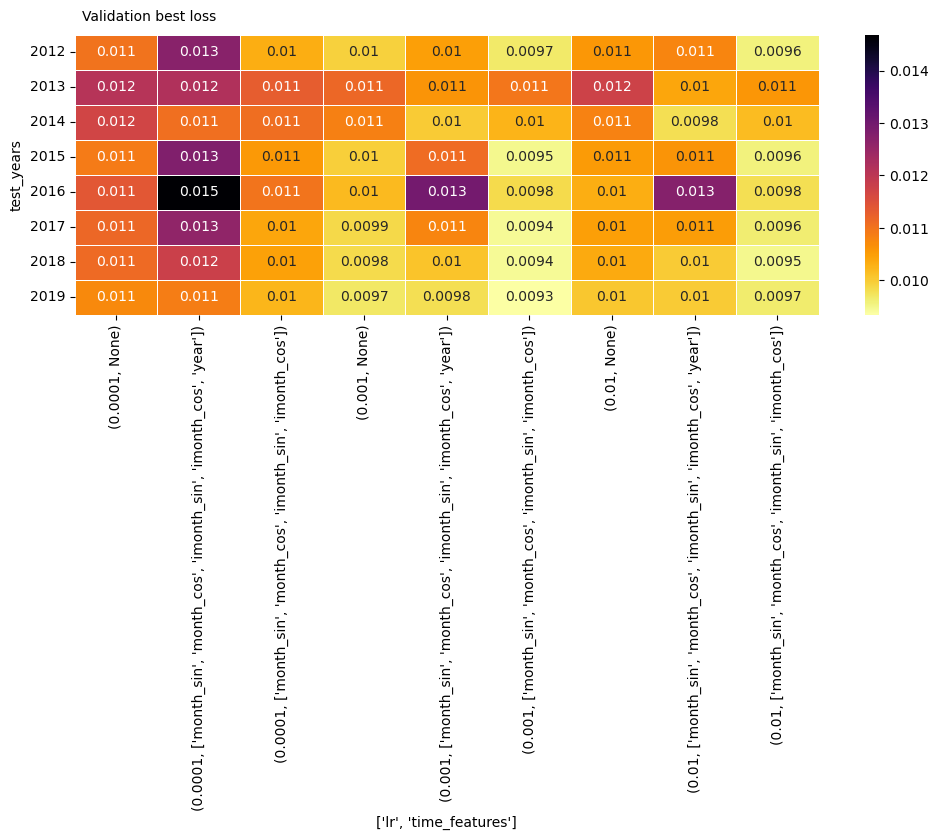

In [4]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss.min('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best loss', transform=ax.transAxes)
plt.xlabel((val_loss.attrs['hyperparameters']))



Text(0.5, 394.58159722222223, "['lr', 'time_features']")

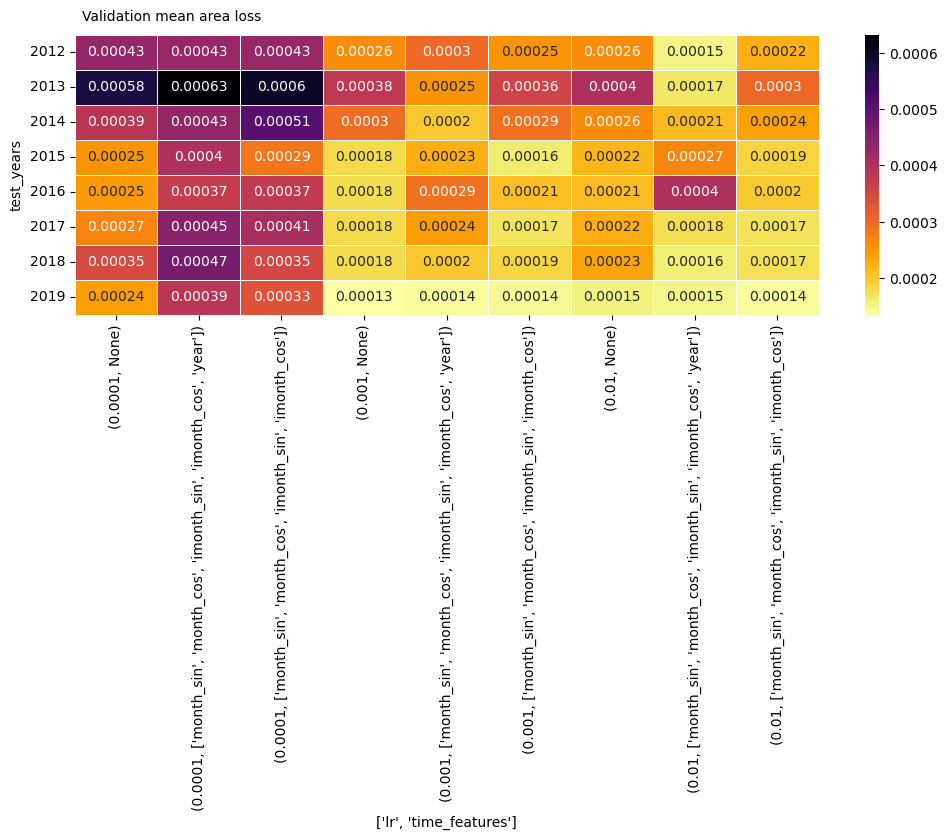

In [5]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
ls = []
for test_year in val_loss_area.test_years.values:
    inds = val_loss.argmin('epochs').sel(test_years = test_year)
    ls.append(xr.concat([val_loss_area.sel(test_years = test_year).isel(hyperparameters = i)[inds[i]] for i in range(val_loss_area.shape[1])], dim = 'hyperparameters'))

dataframe = xr.concat(ls, dim = 'test_years').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation mean area loss', transform=ax.transAxes)
plt.xlabel((val_loss.attrs['hyperparameters']))


Text(0.5, 394.58159722222223, "['batch_size', 'time_features', 'skip_conv']")

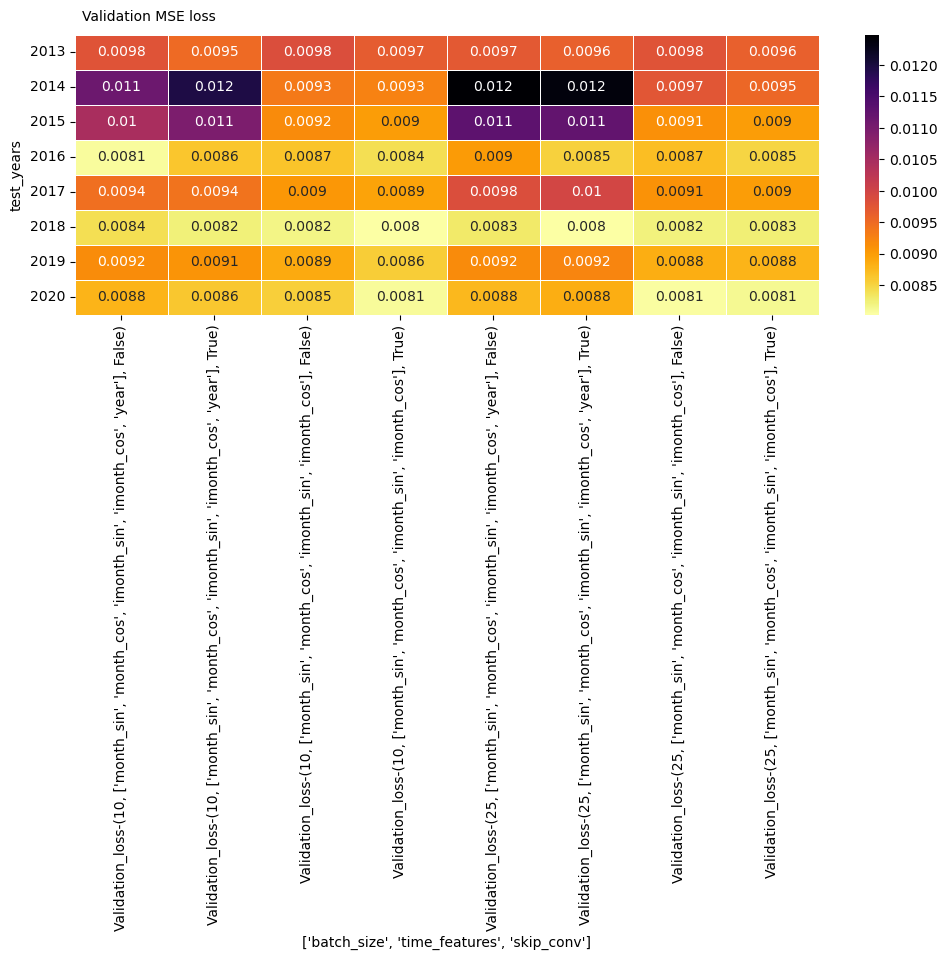

In [6]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
ls = []
for test_year in val_loss_mean.test_years.values:
    inds = val_loss.argmin('epochs').sel(test_years = test_year)
    ls.append(xr.concat([val_loss_mean.sel(test_years = test_year).isel(hyperparameters = i)[inds[i]] for i in range(val_loss_mean.shape[1])], dim = 'hyperparameters'))

dataframe = xr.concat(ls, dim = 'test_years').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation MSE loss', transform=ax.transAxes)
plt.xlabel((val_loss.attrs['hyperparameters']))


Text(0.5, 0, "['lr', 'time_features']")

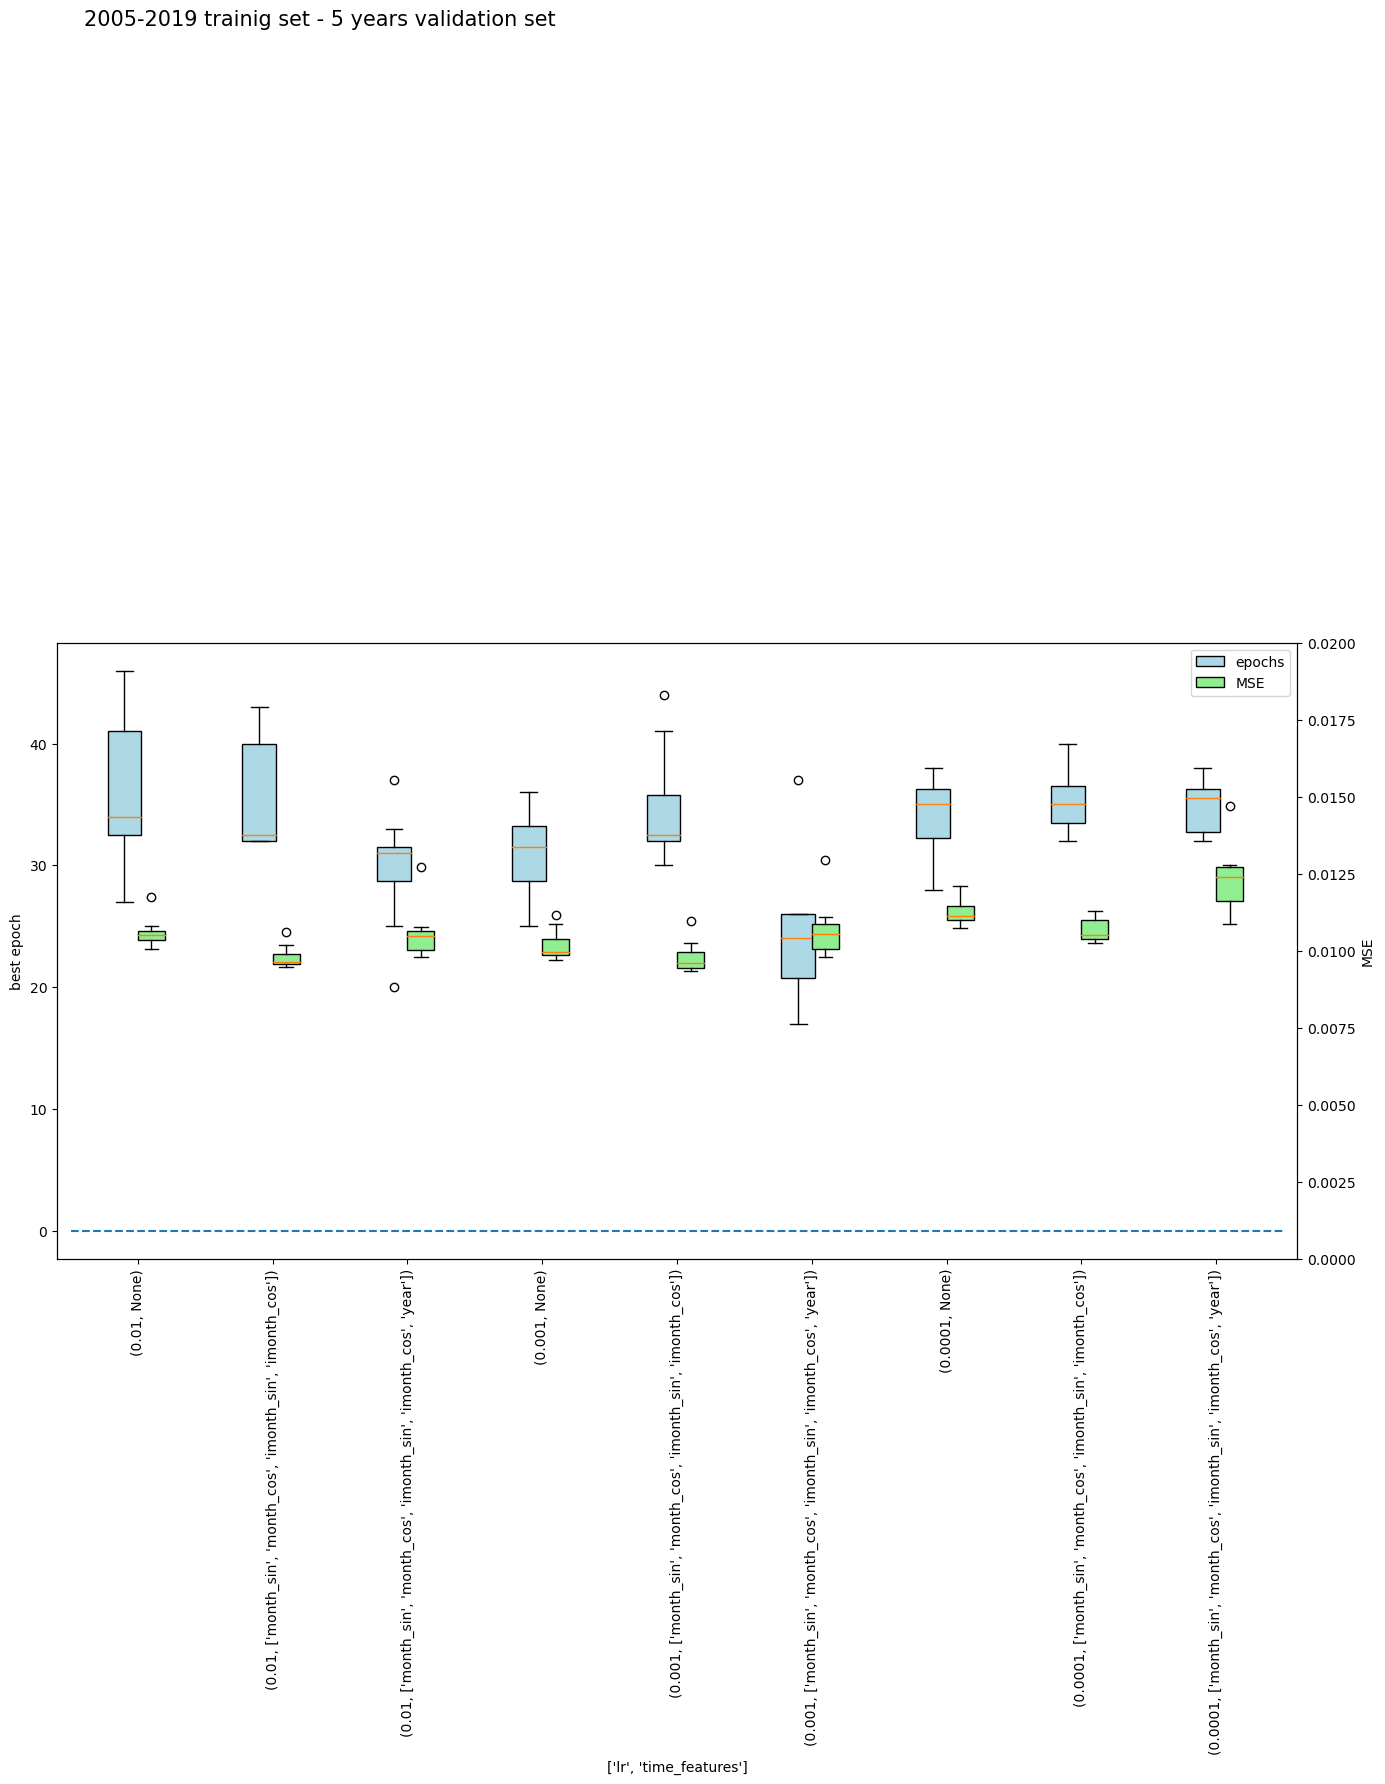

In [6]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (16,8))
hp_space = val_loss.shape[1]
dataframe = val_loss.argmin('epochs')
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightblue"), widths=0.25, positions = np.arange(hp_space)-0.1)
plt.xlabel((val_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_space),val_loss.hyperparameters.values,rotation=90)
plt.hlines(0, -0.5,hp_space - 0.5, linestyle = 'dashed')

plt.ylabel('best epoch')
plt.text(-0.4,val_loss.shape[-1]-1, '2005-2019 trainig set - 5 years validation set ', size = 15)
plt.twinx()
dataframe = val_loss.min('epochs')
b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_space)+0.1)
plt.xticks(np.arange(0,hp_space), val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
plt.ylim([0,0.02])
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['epochs', 'MSE'], loc='upper right')
plt.xlabel((val_loss.attrs['hyperparameters']))

In [16]:
# ls = []
# for ind, item in enumerate(val_loss.hyperparameters.values):
    
#     new = eval(item)
#     if type(eval(item)[1]) == list:
#         ls.append(str((new[0], True, new[2])))
#     else:
#         ls.append(str((new[0], False, new[2])))
# val_loss = val_loss.assign_coords(hyperparameters = ls)
# val_loss.attrs['hyperparameters'] = ['batch_size', ['tmonth_sin','tmonth_cos','imonth_sin','imonth_cos', 'year'], 'bilinear']

Text(0.5, 0, "['batch_size', 'time_features', 'skip_conv']")

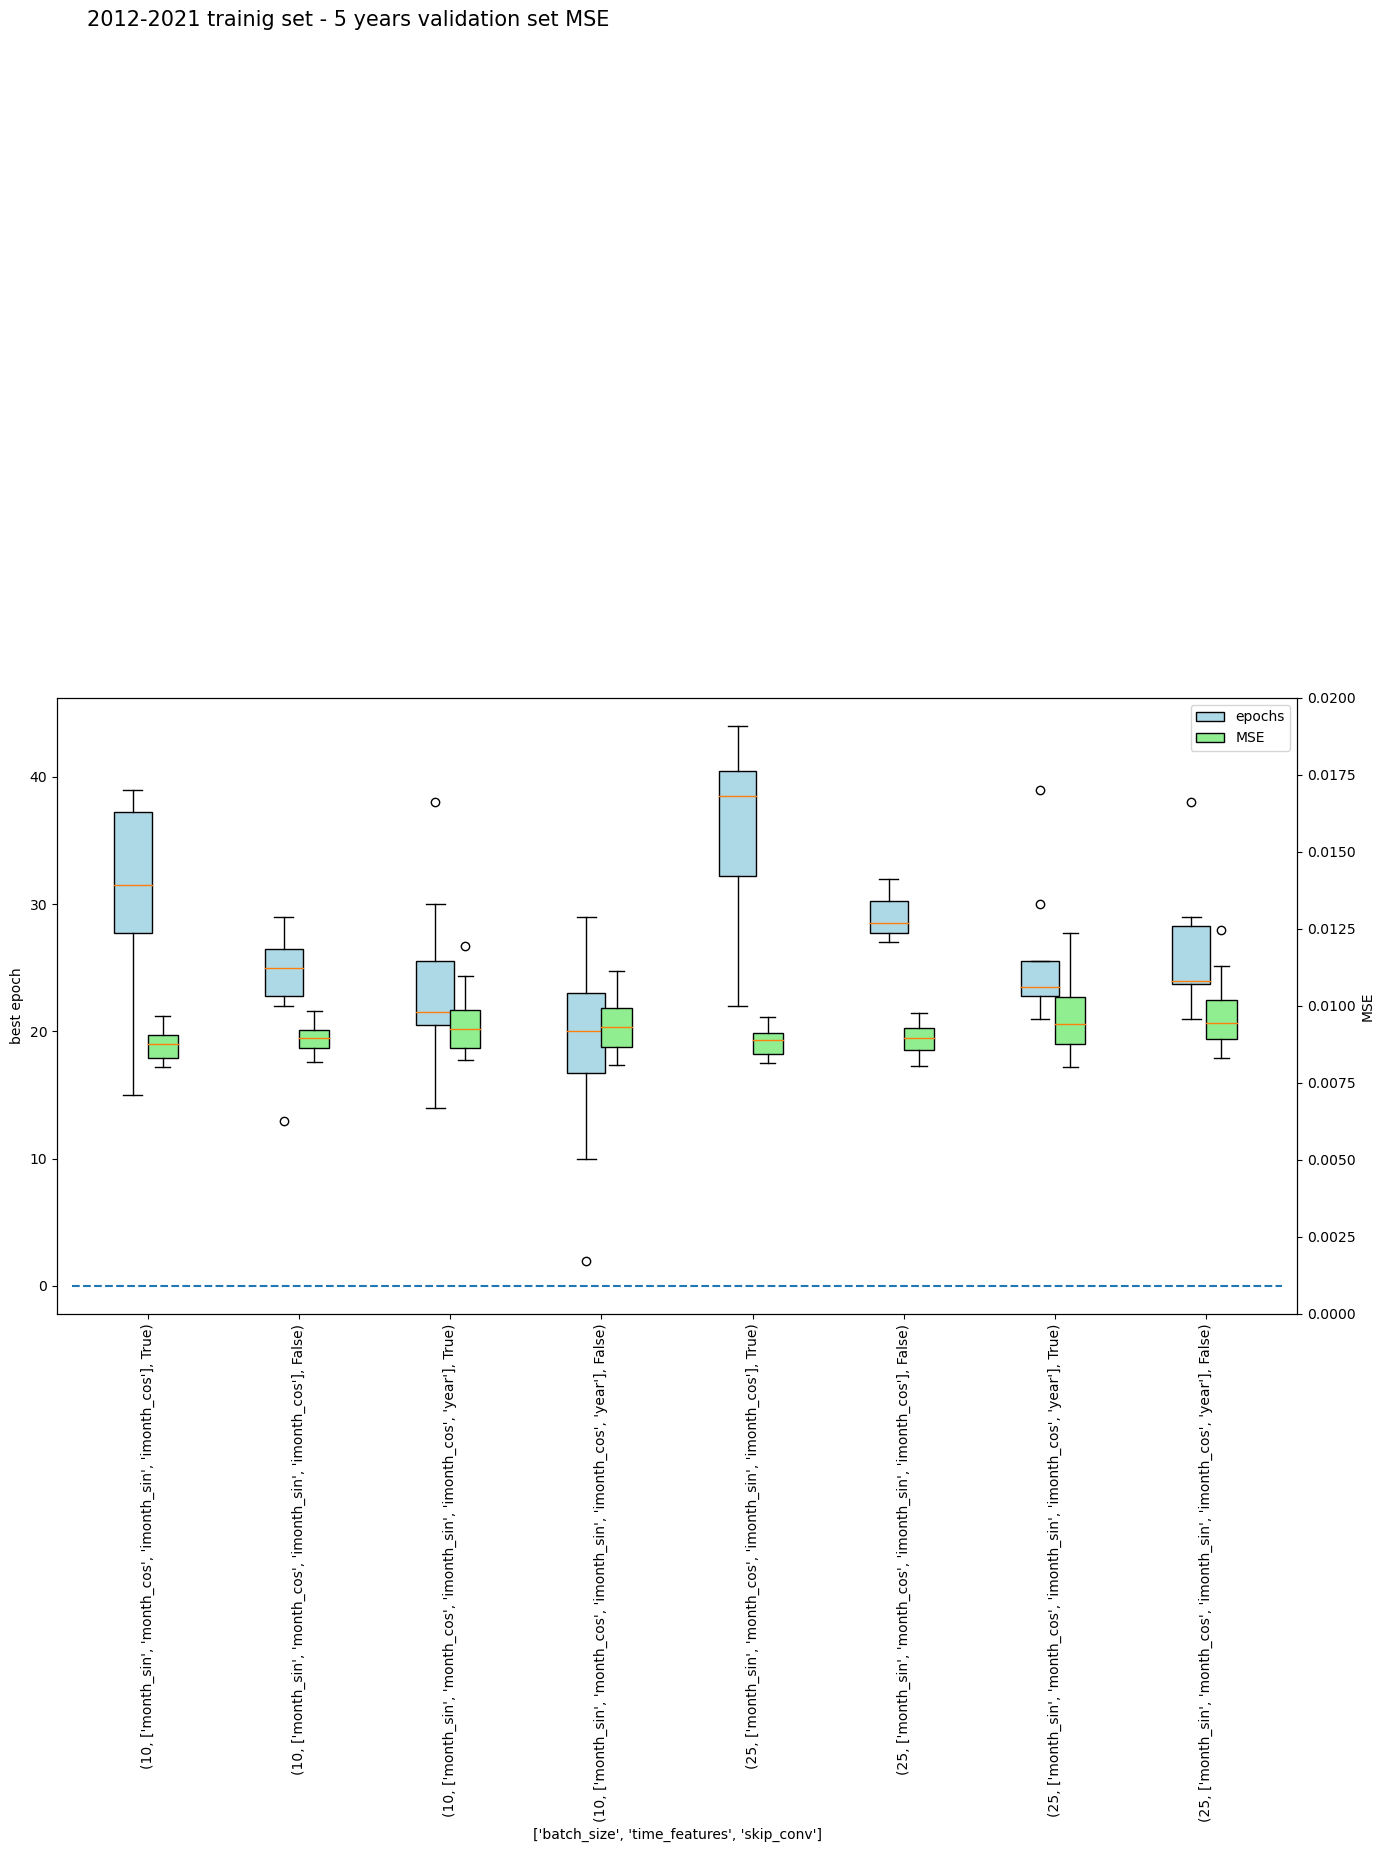

In [8]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (16,8))
hp_space = val_loss.shape[1]
dataframe = val_loss.argmin('epochs')
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightblue"), widths=0.25, positions = np.arange(hp_space)-0.1)
plt.xlabel((val_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_space),val_loss.hyperparameters.values,rotation=90)
plt.hlines(0, -0.5,hp_space - 0.5, linestyle = 'dashed')

plt.ylabel('best epoch')
plt.text(-0.4,val_loss.shape[-1]-1, '2012-2021 trainig set - 5 years validation set MSE  ', size = 15)
# plt.text(-0.4,62, '2005-2019 trainig set - 5 years validation set MSE  ', size = 15)

plt.twinx()
ls = []
for test_year in val_loss_mean.test_years.values:
    inds = val_loss.argmin('epochs').sel(test_years = test_year)
    ls.append(xr.concat([val_loss_mean.sel(test_years = test_year).isel(hyperparameters = i)[inds[i]] for i in range(val_loss_mean.shape[1])], dim = 'hyperparameters'))

dataframe = xr.concat(ls, dim = 'test_years')#.to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_space)+0.1)
plt.xticks(np.arange(0,hp_space),val_loss.hyperparameters.values,rotation=90)
plt.ylim([0,0.02])
plt.ylabel('MSE')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['epochs', 'MSE'], loc='upper right')
plt.xlabel((val_loss.attrs['hyperparameters']))

Text(0.5, 0, "['batch_size', 'time_features', 'skip_conv']")

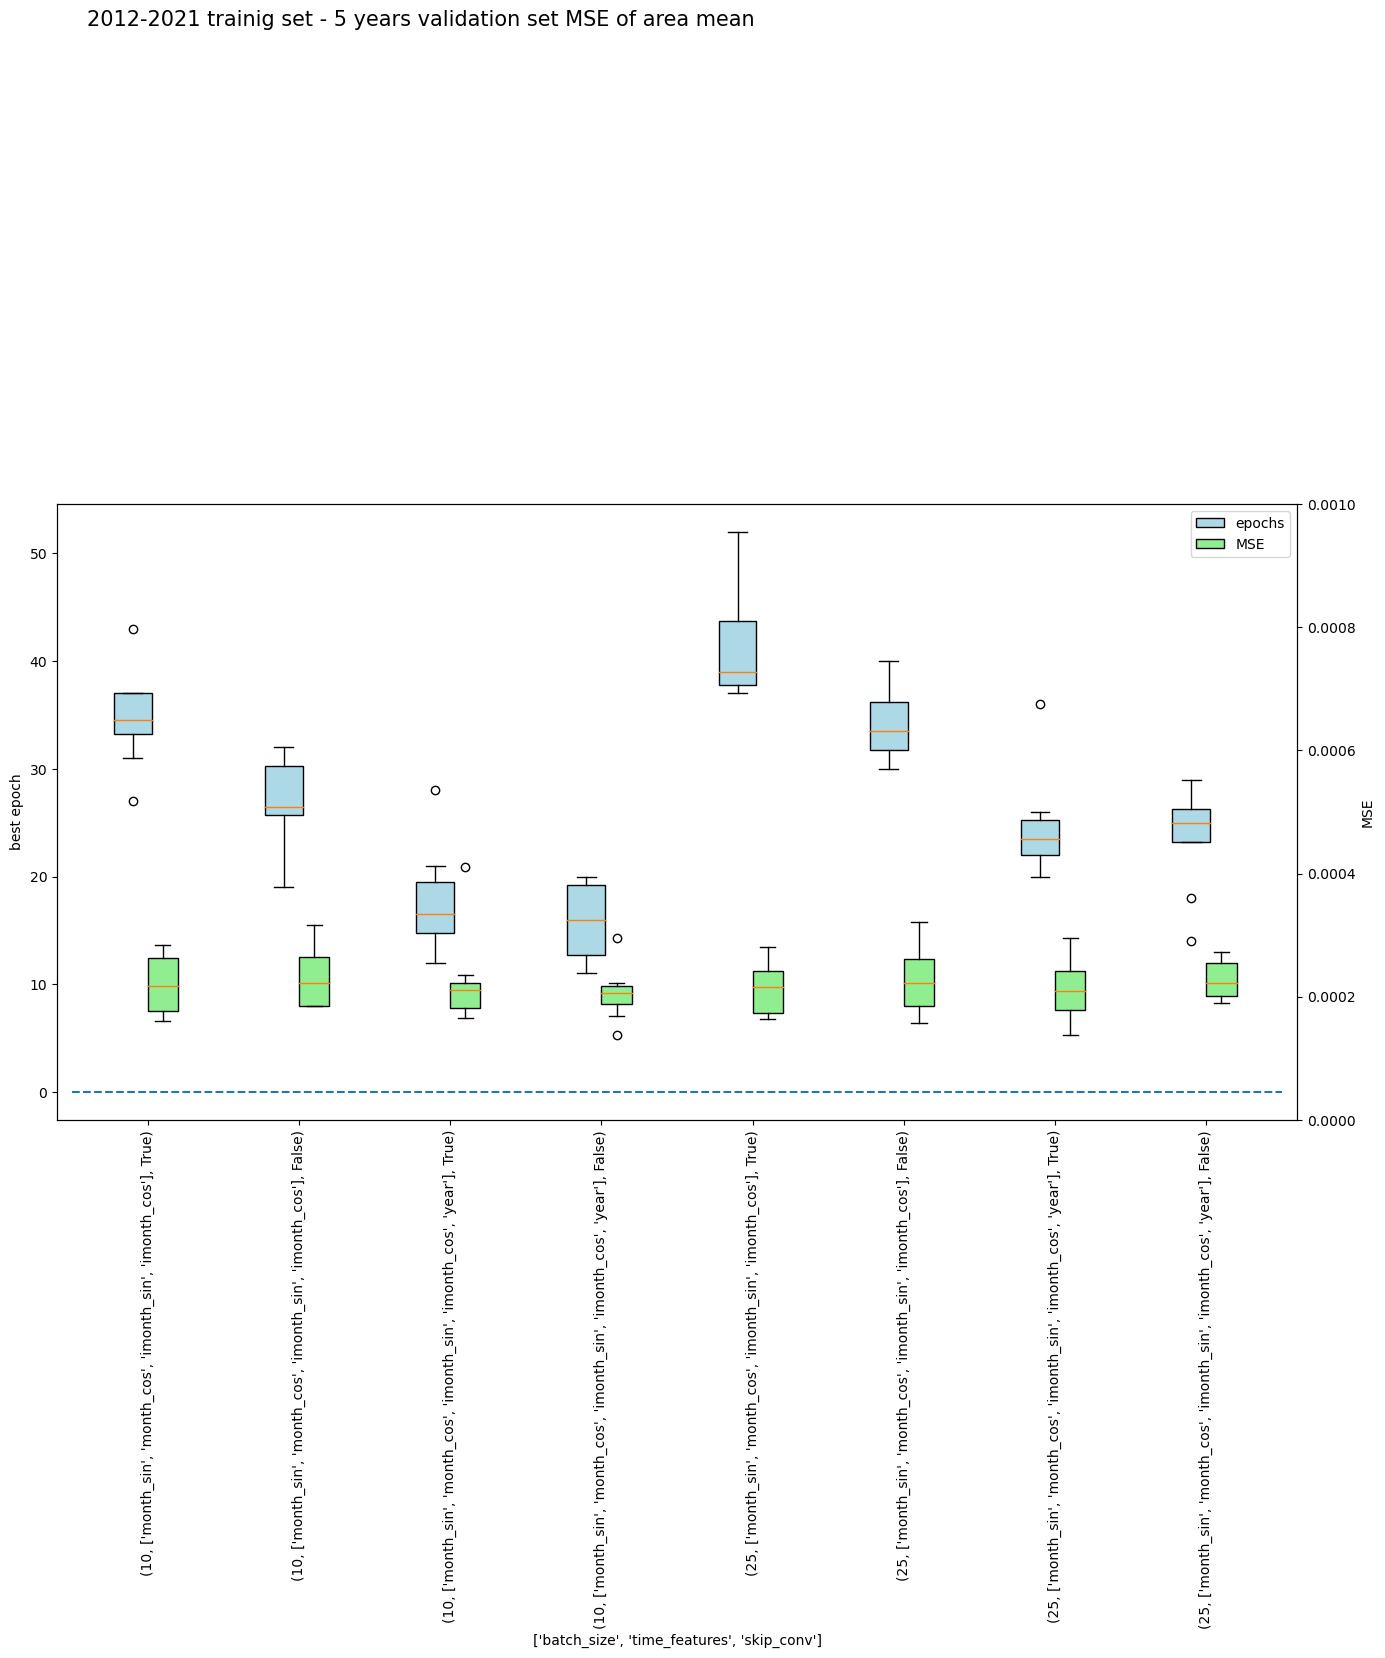

In [9]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (16,8))
dataframe = val_loss.argmin('epochs')
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightblue"), widths=0.25, positions = np.arange(hp_space)-0.1)
plt.xlabel((val_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_space),val_loss.hyperparameters.values,rotation=90)
plt.hlines(0, -0.5,hp_space - 0.5, linestyle = 'dashed')

plt.ylabel('best epoch')
plt.text(-0.4,val_loss.shape[-1]-1, '2012-2021 trainig set - 5 years validation set MSE of area mean ', size = 15)
# plt.text(-0.4,62, '2005-2019 trainig set - 5 years validation set area mean  ', size = 15)
plt.twinx()
ls = []
for test_year in val_loss_area.test_years.values:
    inds = val_loss.argmin('epochs').sel(test_years = test_year)
    ls.append(xr.concat([val_loss_area.sel(test_years = test_year).isel(hyperparameters = i)[inds[i]] for i in range(val_loss_area.shape[1])], dim = 'hyperparameters'))

dataframe = xr.concat(ls, dim = 'test_years')
b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_space)+0.1)
plt.xticks(np.arange(0,hp_space),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
plt.ylim([0,0.001])
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['epochs', 'MSE'], loc='upper right')
plt.xlabel((val_loss.attrs['hyperparameters']))

Text(0.5, 0, "['batch_size', 'time_features', 'skip_conv']")

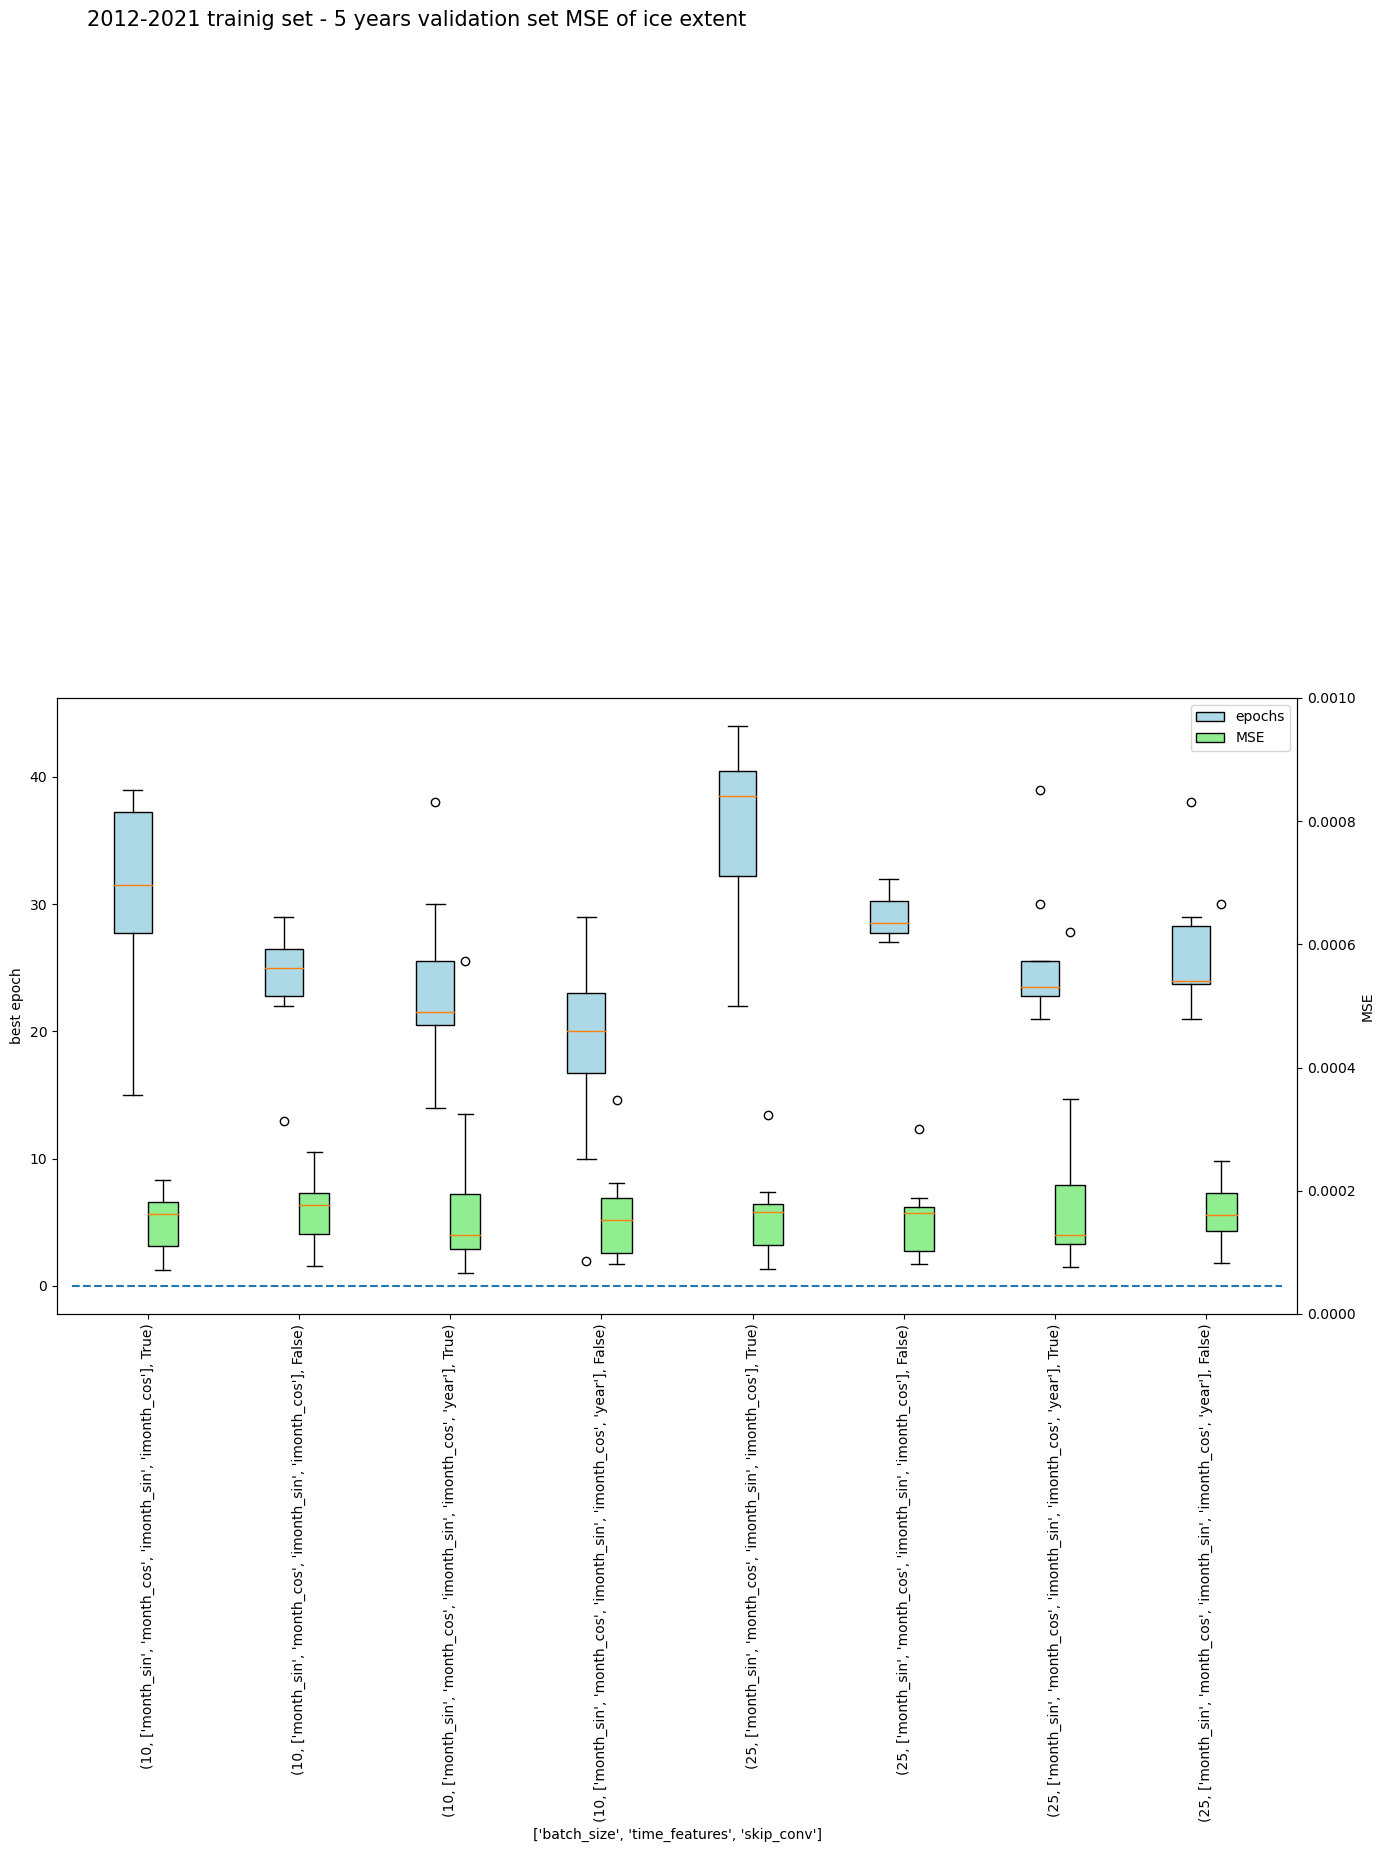

In [9]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (16,8))
dataframe = val_loss.argmin('epochs')
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightblue"), widths=0.25, positions = np.arange(hp_space)-0.1)
plt.xlabel((val_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_space),val_loss.hyperparameters.values,rotation=90)
plt.hlines(0, -0.5,hp_space - 0.5, linestyle = 'dashed')

plt.ylabel('best epoch')
plt.text(-0.4,val_loss.shape[-1]-1, '2012-2021 trainig set - 5 years validation set MSE of ice extent ', size = 15)
# plt.text(-0.4,62, '2005-2019 trainig set - 5 years validation set area mean  ', size = 15)
plt.twinx()
ls = []
for test_year in val_loss_extent.test_years.values:
    inds = val_loss.argmin('epochs').sel(test_years = test_year)
    ls.append(xr.concat([val_loss_extent.sel(test_years = test_year).isel(hyperparameters = i)[inds[i]] for i in range(val_loss_extent.shape[1])], dim = 'hyperparameters'))

dataframe = xr.concat(ls, dim = 'test_years')
b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_space)+0.1)
plt.xticks(np.arange(0,hp_space),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
plt.ylim([0,0.001])
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['epochs', 'MSE'], loc='upper right')
plt.xlabel((val_loss.attrs['hyperparameters']))

Text(0.5, 0, "['batch_size', 'time_features', 'skip_conv']")

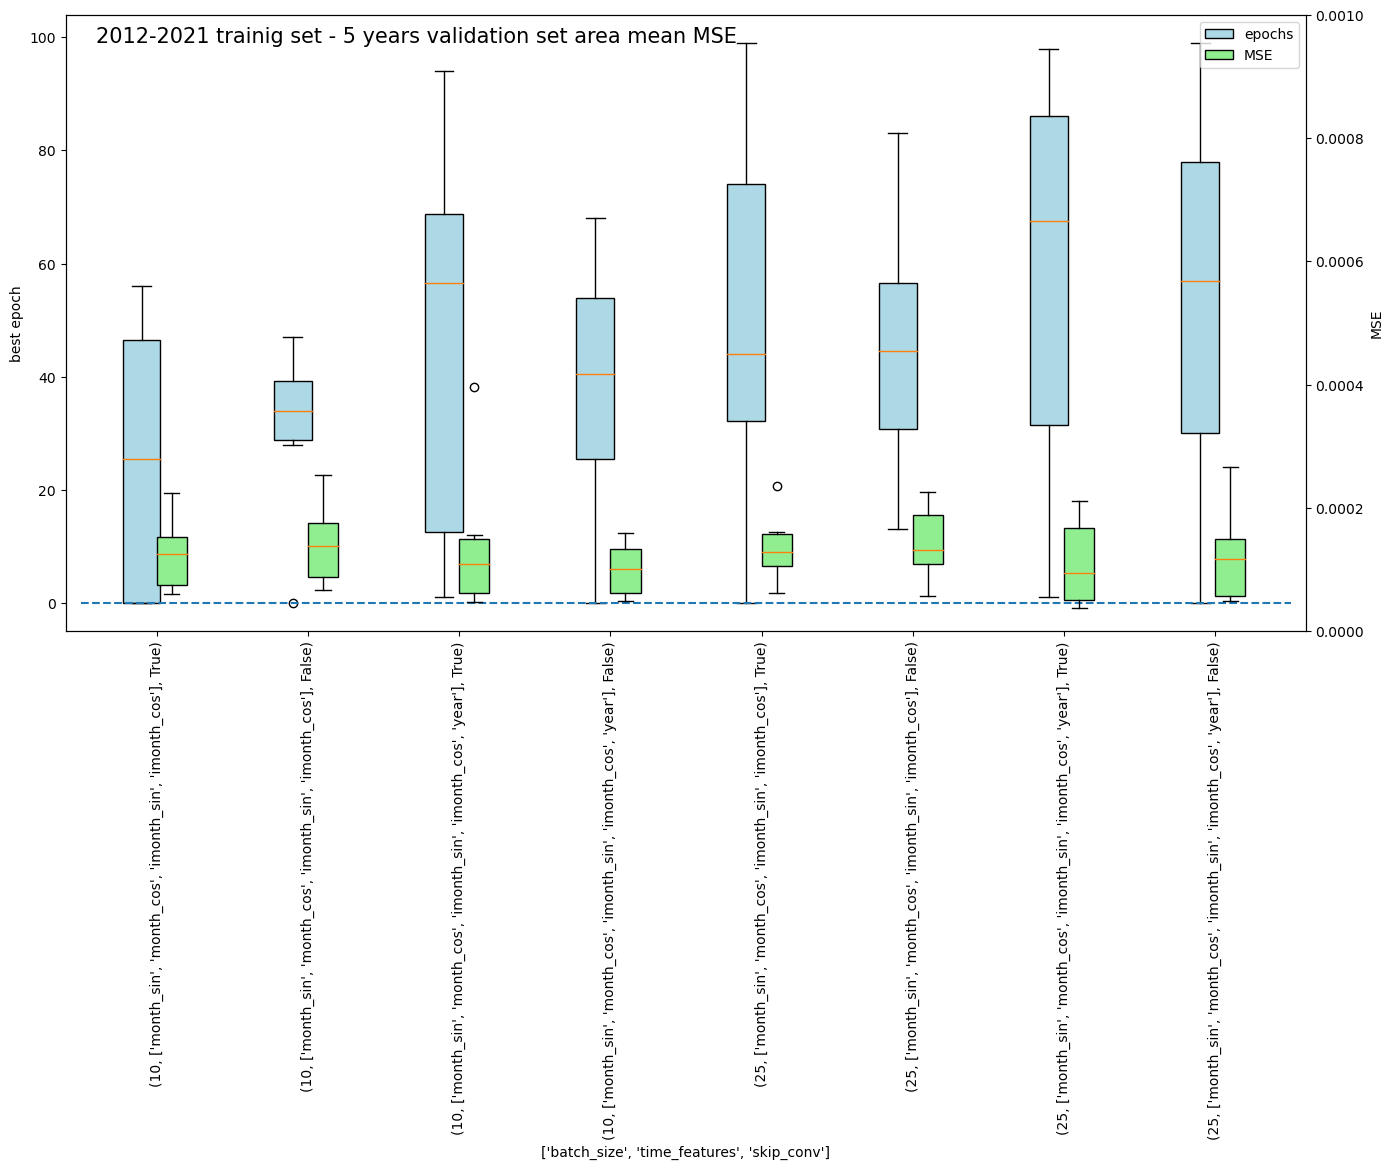

In [10]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (16,8))
hp_space = val_loss_area.shape[1]
dataframe = val_loss_area.argmin('epochs')
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightblue"), widths=0.25, positions = np.arange(hp_space)-0.1)
plt.xlabel((val_loss_area.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_space),val_loss_area.hyperparameters.values,rotation=90)
plt.hlines(0, -0.5,hp_space - 0.5, linestyle = 'dashed')

plt.ylabel('best epoch')
plt.text(-0.4,val_loss_area.shape[-1]-1, '2012-2021 trainig set - 5 years validation set area mean MSE ', size = 15)
# plt.text(-0.4,62, '2005-2019 trainig set - 5 years validation set MSE  ', size = 15)

plt.twinx()
ls = []
for test_year in val_loss_area.test_years.values:
    inds = val_loss_area.argmin('epochs').sel(test_years = test_year)
    ls.append(xr.concat([val_loss_area.sel(test_years = test_year).isel(hyperparameters = i)[inds[i]] for i in range(val_loss_area.shape[1])], dim = 'hyperparameters'))

dataframe = xr.concat(ls, dim = 'test_years')#.to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_space)+0.1)
plt.xticks(np.arange(0,hp_space),val_loss_area.hyperparameters.values,rotation=90)
plt.ylim([0,0.001])
plt.ylabel('MSE')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['epochs', 'MSE'], loc='upper right')
plt.xlabel((val_loss_area.attrs['hyperparameters']))